In [14]:
import pandas as pd
import numpy as np

In [15]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_auc_score, roc_curve
)

import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
X = pd.read_csv('../data/X_processed.csv')
y = pd.read_csv('../data/y_processed.csv').squeeze()


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y
)


In [18]:
log_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)


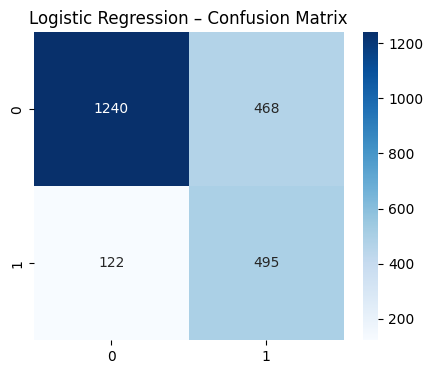

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1708
           1       0.51      0.80      0.63       617

    accuracy                           0.75      2325
   macro avg       0.71      0.76      0.72      2325
weighted avg       0.81      0.75      0.76      2325



In [19]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression – Confusion Matrix")
plt.savefig('../results/confusion_matrix.png')
plt.show()

print(classification_report(y_test, y_pred))


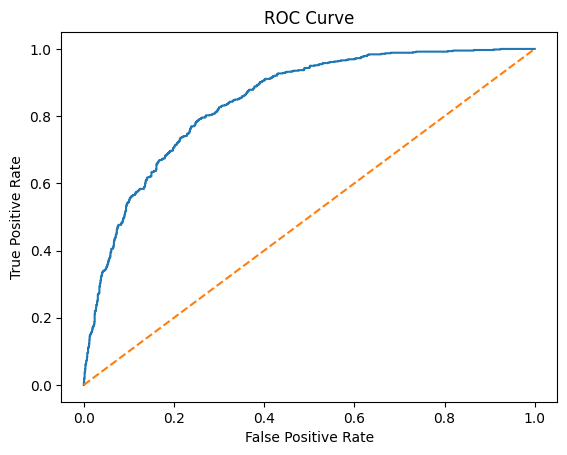

ROC-AUC: 0.8449611704287955


In [20]:
y_prob = log_model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('../results/roc_curve.png')
plt.show()

print("ROC-AUC:", roc_auc_score(y_test, y_prob))
